# &AElig;co
***Comapare module***
<br/><br/>

✈️♻️

This code is part of the Master's Thesis "Streamlined Life Cycle Assessment Method for Aircraft Eco-Design", by Giácomo Parolin.
This module is used to compare two different Life-Cycle Impact Assessment results.

***Log***


**December 23, 2019: &AElig;co, calc module**
* Separates calculations from data visualization
* Outputs results to .csv files

**December 18, 2019: &AElig;co, gamma version**
* Tidied up LCI results

**December 08, 2019: &AElig;co, beta version**
* Tidied up reading of Input and UP files
* Implemented Sensitivity Analysis
* Full translation to english

**December 08, 2019: &AElig;co, alpha version**
* Todos os UPs lastreados no ecoinvent3.6 consquential
* Método atualizado com modificações propostas na qualificação


**November 10, 2019: Monte Carlo Try-out**
* Todos os inputs partem de um arquivo excel.
* Inputs atrelados a funções de densidade de probabilidade

**October 24, 2019: Code_Johanning_v2**
* Troca de _numpy_ para _pandas_ para todos (ou maioria dos) os vetores e matrizes.
* Leitura dos EF a partir de planilha excel.

# Initial Definitions

**Please enter the following information:**

In [11]:
#User defined variables!

#First LCA results file path and name
results_path_A = '.\\results\\Mistral_Echo_outputs.xlsx'
name_A = 'Echo'

#Second LCA results file path and name
results_path_B = '.\\results\\Whatif_Composite_outputs.xlsx'
name_B = 'Composite'

**Reference Unit**: Final results of midpoint and endpoint indicators are expressed in terms of *impact per pkm* or *impact per tkm*.

**Uncertainty and Sensitivity Analysis**: Monte-Carlo Simulation is used. Input varies according to a Beta-PERT probability distribution, built from most-likely, maximum and minimum values.

The first part of the code loads some python packages and defines some functions which will be used later. The file containing the inputs is loaded into the code and some initial calculations are made. The unit process (UP) and characterization factor (CF) data used in the code are read from an excel file ("database.xlsx"). Most of the data was obtained from the [ecoinvent database](https://www.ecoinvent.org/).

In [2]:
#packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as spear
import warnings

#functions

def avg(series):
    ''' Calcula a média de cada linha de um pd.Series composto de np.arrays
    
    '''
    
    return series.apply(lambda x: np.mean(x))

def div(df1, df2):
    ''' Divide um pd.DataFrame por um DataFrame element-wise
    
    '''
    
    return df1.applymap(lambda x: x/df2)

def database_df(df):
    ''' Transforma o resultado do LCIA em um DataFrame consolidado por categoria 
    
    '''
    
    A = pd.Series([])
    for row in df.itertuples():
        A[row[0]] = df.loc[row[0]].sum()
        
    db = pd.DataFrame.from_records(zip(*A.values))
    db.columns = A.index
    return db

def database_series(series):
    ''' Transforma um pd.Series de listas em um pd. DataFrame
    
    '''
    
    db = pd.DataFrame.from_records(zip(*series.values))
    db.columns = series.index
    return db

def arrayfy(string):
    ''' Transforma uma string em np.array
    
    '''
    if string[1] == ' ':
        A = string[2:-1].replace('\n','').replace('      ',',').replace('     ',',').replace('    ',',').replace('   ',',').replace('  ',',').replace(' ',',')
    else:
        A = string[1:-1].replace('\n','').replace('      ',',').replace('     ',',').replace('    ',',').replace('   ',',').replace('  ',',').replace(' ',',')
        
    return np.fromstring(A, sep=',')

def percent(series):
    ''' Formats a pd.Series to show values in percentages in descending order. 
    
    '''
    return series.sort_values(ascending=False).dropna().apply(lambda x: x*100).apply('{:,.3f}'.format)

In [12]:
#Leitura dos resultados do LCA

#first
with pd.ExcelFile(results_path_A) as xlsx:
    MP_A = pd.read_excel(xlsx, 'MP', header=[0,1], index_col=0)
    EP_A = pd.read_excel(xlsx, 'EP', header=[0,1], index_col=0)

#second
with pd.ExcelFile(results_path_B) as xlsx:
    MP_B = pd.read_excel(xlsx, 'MP', header=[0,1], index_col=0)
    EP_B = pd.read_excel(xlsx, 'EP', header=[0,1], index_col=0)

In [13]:
MP_A = MP_A.applymap(arrayfy)
MP_B = MP_B.applymap(arrayfy)

In [14]:
EP_A = EP_A.applymap(arrayfy)
EP_B = EP_B.applymap(arrayfy)

# Midpoint Results

Two LCA results can be compared by dividing one result by another, analyzing how the ratios compare thoughout the values obtained by the monte carlo simulation.

In [15]:
MP_RATIO = MP_A.sum(axis=1)/MP_B.sum(axis=1)
MP_RATIO.apply(np.median).sort_values(ascending = False)

marine ecotoxicity                 1.036631
freshwater ecotoxicity             1.032054
human toxicity                     1.016271
freshwater eutrophication          1.015348
natural land transformation        1.005847
metal depletion                    1.004636
marine eutrophication              1.002804
urban land occupation              1.002573
particulate matter formation       1.000330
terrestrial acidification          0.998873
photochemical oxidant formation    0.996603
water depletion                    0.995060
ozone depletion                    0.994578
ionising radiation                 0.994514
climate change                     0.994028
terrestrial ecotoxicity            0.992468
fossil depletion                   0.992278
agricultural land occupation       0.990362
dtype: float64

In all categories, the median of the ratio is smaller than unity, meaning that **A has less significant environmental impacts than B in every midpoint category**.

The same can be observed in the figure below.

In [24]:
MP_DB = database_series(MP_RATIO2)

In [17]:
#Abbreviated names of impact cateogries and units
MP_names = pd.DataFrame(index=MP_RATIO.index, columns=['abbreviation', 'unit']).T

MP_names['freshwater eutrophication'] = ['FE', '$yr \times kg / m^3$']
MP_names['metal depletion'] = ['MRD', '$kg^{-1}$']
MP_names['photochemical oxidant formation'] = ['POF','$kg$']
MP_names['marine ecotoxicity'] = ['MET','$m^{2} \times yr$']
MP_names['terrestrial acidification'] = ['TA','$yr \times m^{2}$']
MP_names['urban land occupation'] = ['ULO','$m^{2} \times yr$']
MP_names['particulate matter formation'] = ['POF','$kg$']
MP_names['terrestrial ecotoxicity'] = ['TET','$m^{2} \times yr$']
MP_names['freshwater ecotoxicity'] = ['FET','$m^{2} \times yr$']
MP_names['natural land transformation'] = ['NLT','$m^2$']
MP_names['ozone depletion'] = ['OD','$ppt \times yr$']
MP_names['marine eutrophication'] = ['ME','$yr \times kg / m^3$']
MP_names['agricultural land occupation'] = ['ALO','$m^{2} \times yr$']
MP_names['human toxicity'] = ['HT','--']
MP_names['ionising radiation'] = ['IR','$man \times Sv$']
MP_names['fossil depletion'] = ['FD','$MJ$']
MP_names['water depletion'] = ['WD','$m^3$']
MP_names['climate change'] = ['CC','$W \times yr / m^{2}$']

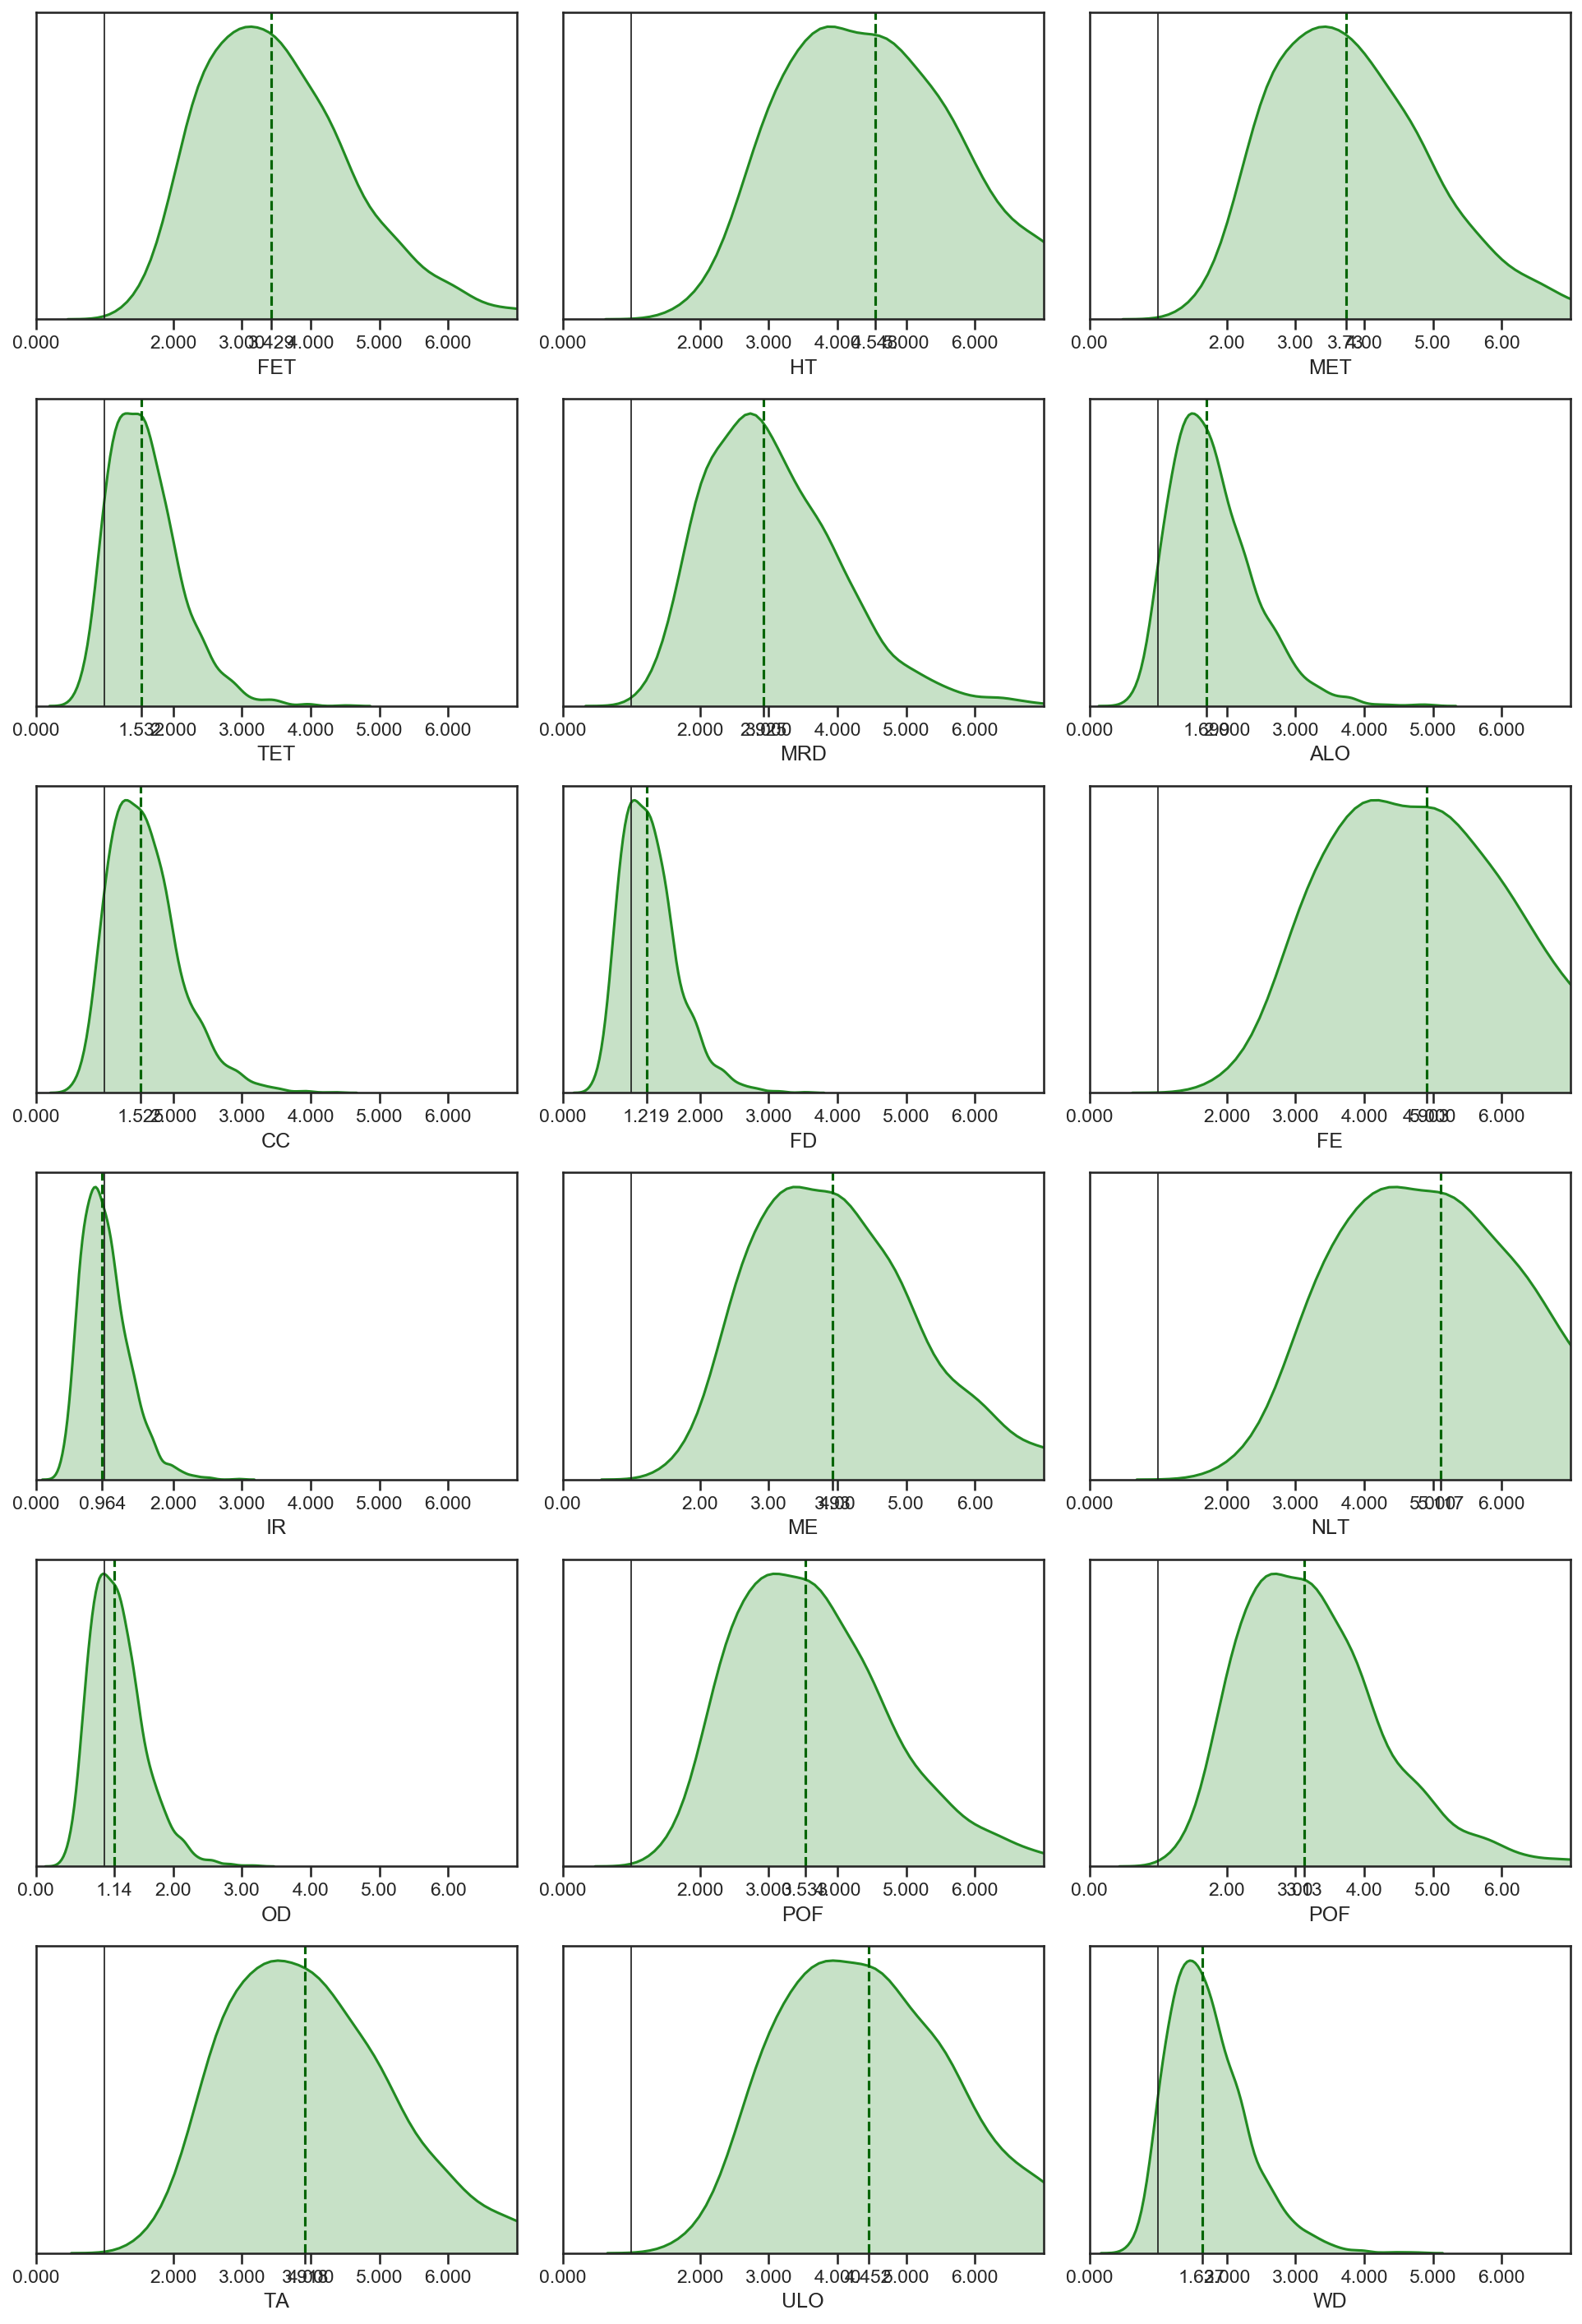

In [27]:
f, axes = plt.subplots(6, 3, figsize=(13, 19))
#sns.despine(left=True)
sns.set(style="ticks", palette="muted", color_codes=True)
axes = axes.ravel()

for column in MP_DB:
    i = MP_DB.columns.get_loc(column)
    sns.distplot(MP_DB[column], kde=True, hist=False, kde_kws={"shade": True}, \
                 ax=axes[i], color='forestgreen')
    axes[i].set_xlabel(MP_names[column]['abbreviation'],fontsize=12)
    axes[i].axvline(1, 0, 1, color='k', ls= '-', lw=0.8)
    axes[i].axvline(MP_DB[column].median(), 0, 1, color='darkgreen', ls= '--')
    axes[i].set_xticks([0, 0.5, MP_DB[column].median(), 1.5, 2])
    
plt.setp(axes, yticks=[], xlim=[0,2])
plt.tight_layout()
f.set_dpi(150)
f.savefig('.\\results\\' + name_A + ' vs ' + name_B + ' midpoint.pdf', bbox_inches='tight', papertype='A3')
plt.show()

# Endpoint Results

In [19]:
EP_RATIO = EP_A.sum(axis=1)/EP_B.sum(axis=1)

In [20]:
EP_RATIO.apply(np.median).sort_values(ascending = False)

Damage to Human Health             0.995963
Damage to Ecosystem Diversity      0.994076
Damage to Resource Availability    0.992356
dtype: float64

In [21]:
EP_RATIO.apply(lambda x: x < 1).apply(lambda x:np.sum(x)/len(x)*100)

Damage to Human Health             50.85
Damage to Ecosystem Diversity      51.10
Damage to Resource Availability    51.50
dtype: float64

In all categories, the median of the ratio is smaller than unity, meaning that **A has less significant environmental impacts than B in every endpoint category**.

The same can be observed in the figure below.

In [178]:
EP_DB = database_series(EP_RATIO)

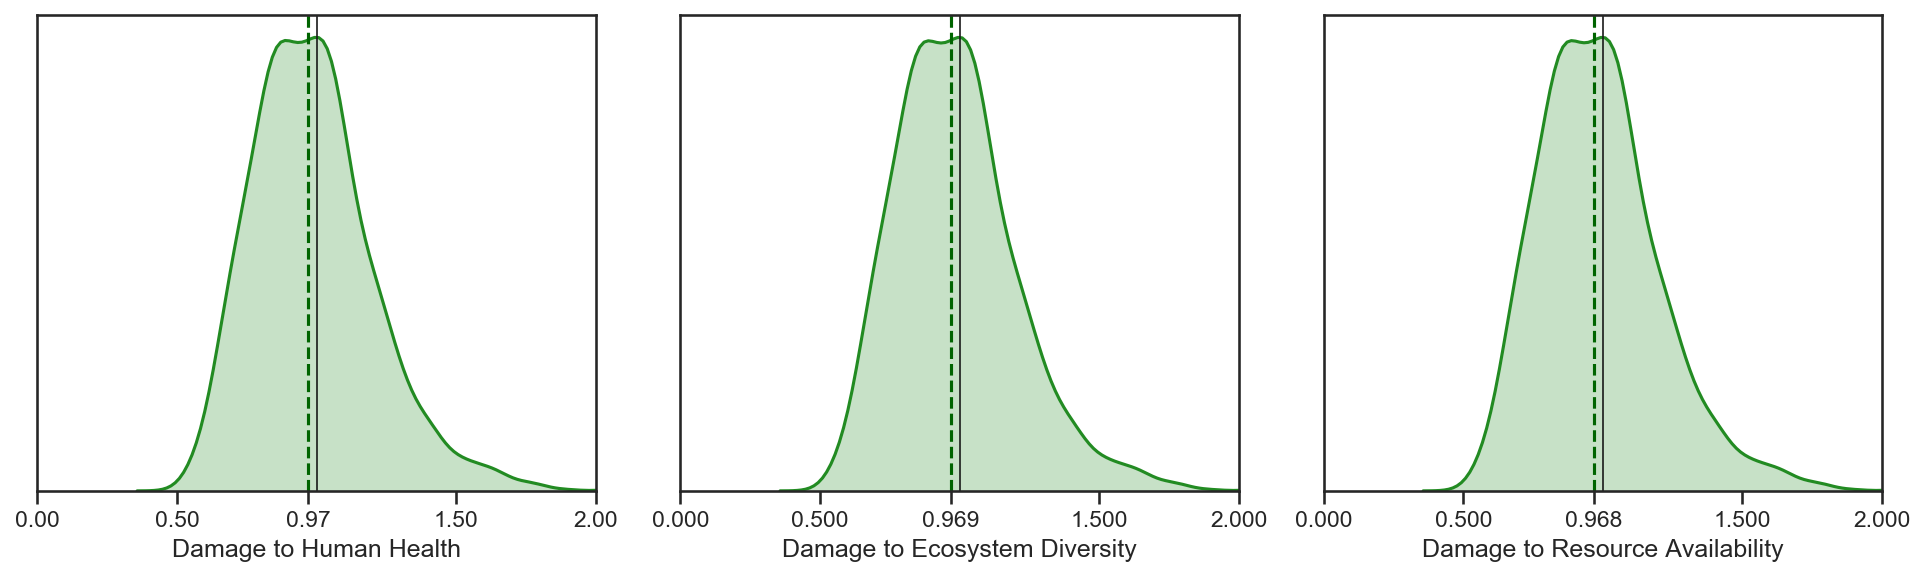

In [179]:
f, axes = plt.subplots(1, 3, figsize=(13, 4))
sns.set(style="ticks", palette="muted", color_codes=True)
axes = axes.ravel()

for column in EP_DB:
    i = EP_DB.columns.get_loc(column)
    sns.distplot(EP_DB[column], kde=True, hist=False, kde_kws={"shade": True}, \
                 ax=axes[i], color='forestgreen')
    axes[i].axvline(1, 0, 1, color='k', ls= '-', lw=0.8)
    axes[i].axvline(EP_DB[column].median(), 0, 1, color='darkgreen', ls= '--')
    axes[i].set_xticks([0, 0.5, EP_DB[column].median(), 1.5, 2])
    
plt.setp(axes, yticks=[],  xlim=[0,2])
plt.tight_layout()
f.set_dpi(150)
f.savefig('.\\results\\' + name_A + ' vs ' + name_B + ' endpoint.pdf', bbox_inches='tight', papertype='A4')
plt.show()